In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore');

In [2]:
df = pd.read_csv('data1.csv', header=None) #Not consider first row as header
columns = {
        i: f'Feature {i+1}'
        for i in range(len(df.columns))
    }

In [3]:
df.rename(columns=columns, inplace=True)
print(f'The dataset has:\nSampels: {df.shape[0]}\nFeatures: {df.shape[1]}')
display(df.head())

The dataset has:
Sampels: 1000
Features: 60


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Feature 60
0,109,0,1,7,9,0,5,8,6,0,...,3,0,11,0,0,0,0,1,18,1
1,309,21,4,1,19,1,4,35,23,0,...,10,0,13,0,14,9,1,1,14,1
2,149,6,1,8,14,0,5,15,11,0,...,2,0,8,0,3,2,1,1,18,1
3,305,18,5,7,26,0,10,37,21,1,...,8,3,13,1,7,1,1,1,20,1
4,491,23,8,33,47,0,12,61,36,0,...,16,2,34,1,5,6,1,1,24,1


In [4]:
display(df.describe())

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Feature 60
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,697.120000,39.005000,13.934000,20.626000,66.452000,1.054000,11.477000,75.151000,47.432000,2.152000,...,19.187000,5.419000,29.942000,4.389000,17.124000,11.899000,0.927000,0.995000,19.142000,0.635000
std,523.340997,32.134835,13.617528,22.765773,52.045407,1.663084,12.690174,55.927293,38.373218,2.858158,...,16.756754,5.811989,25.226752,5.126008,17.811285,12.356354,0.260267,0.070569,6.632483,0.481671
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,272.000000,13.000000,4.000000,7.000000,24.750000,0.000000,3.000000,31.750000,19.000000,0.000000,...,6.000000,1.000000,11.000000,1.000000,4.000000,3.000000,1.000000,1.000000,15.000000,0.000000
50%,626.000000,33.000000,10.000000,14.000000,58.000000,0.000000,8.000000,67.000000,40.000000,1.000000,...,14.000000,4.000000,24.000000,3.000000,11.000000,8.000000,1.000000,1.000000,18.000000,1.000000
75%,953.250000,56.000000,20.250000,26.250000,93.000000,1.000000,15.000000,103.000000,65.000000,3.000000,...,29.000000,8.000000,44.000000,7.000000,25.000000,18.000000,1.000000,1.000000,22.000000,1.000000
max,4283.000000,237.000000,97.000000,225.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,127.000000,39.000000,220.000000,31.000000,142.000000,97.000000,1.000000,1.000000,73.000000,1.000000


In [5]:
display(df.isnull().any())

Feature 1     False
Feature 2     False
Feature 3     False
Feature 4     False
Feature 5     False
Feature 6     False
Feature 7     False
Feature 8     False
Feature 9     False
Feature 10    False
Feature 11    False
Feature 12    False
Feature 13    False
Feature 14    False
Feature 15    False
Feature 16    False
Feature 17    False
Feature 18    False
Feature 19    False
Feature 20    False
Feature 21    False
Feature 22    False
Feature 23    False
Feature 24    False
Feature 25    False
Feature 26    False
Feature 27    False
Feature 28    False
Feature 29    False
Feature 30    False
Feature 31    False
Feature 32    False
Feature 33    False
Feature 34    False
Feature 35    False
Feature 36    False
Feature 37    False
Feature 38    False
Feature 39    False
Feature 40    False
Feature 41    False
Feature 42    False
Feature 43    False
Feature 44    False
Feature 45    False
Feature 46    False
Feature 47    False
Feature 48    False
Feature 49    False
Feature 50    False


In [6]:
def get_X_y():
    X = df.iloc[:,:-1] # All columns except the last one
    y = df.iloc[:,-1] # The last column
    return X, y
X, y = get_X_y()

# Standardize the Data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use **StandardScaler** to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [7]:
def series2df(s):
    return s.to_frame()# (n,) -> (n, 1)

def split(X, y, test_size=0.1, shuffle=True, random_state=5):
    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    shuffle=shuffle,
                                                    random_state=random_state)
    # Fit on training set only.
    scaler.fit(X_train)
    
    # Apply transform to both the training set and the test set.
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    y_train = series2df(y_train) 
    y_test = series2df(y_test)   
    return X_train, X_test, y_train, y_test


# a. Split the data into 90:10 of train:test

In [8]:
# print(y)
X_train, X_test, y_train, y_test = split(X, y)

# Construct a PCA model model on the train data columns 1-59 with l=2. 


# Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components.

In [9]:
def Explained_Variance(model, tot=3):
    
    per_var = np.round(model.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
    
    loading_scores = pd.Series(per_var, index=labels)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    top_pc = sorted_loading_scores[:tot].index.values
    display(loading_scores[top_pc]);
    
    plt.figure(figsize=[25, 7])
    plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
    plt.xticks(fontsize=14, rotation=45)
    plt.ylabel('Percentage of Explained Variance', fontsize=20)
    plt.xlabel('Principal Component', fontsize=20)
    plt.show()

    

# PCA without restrictions

PC1    50.9
PC2     5.4
PC3     3.8
dtype: float64

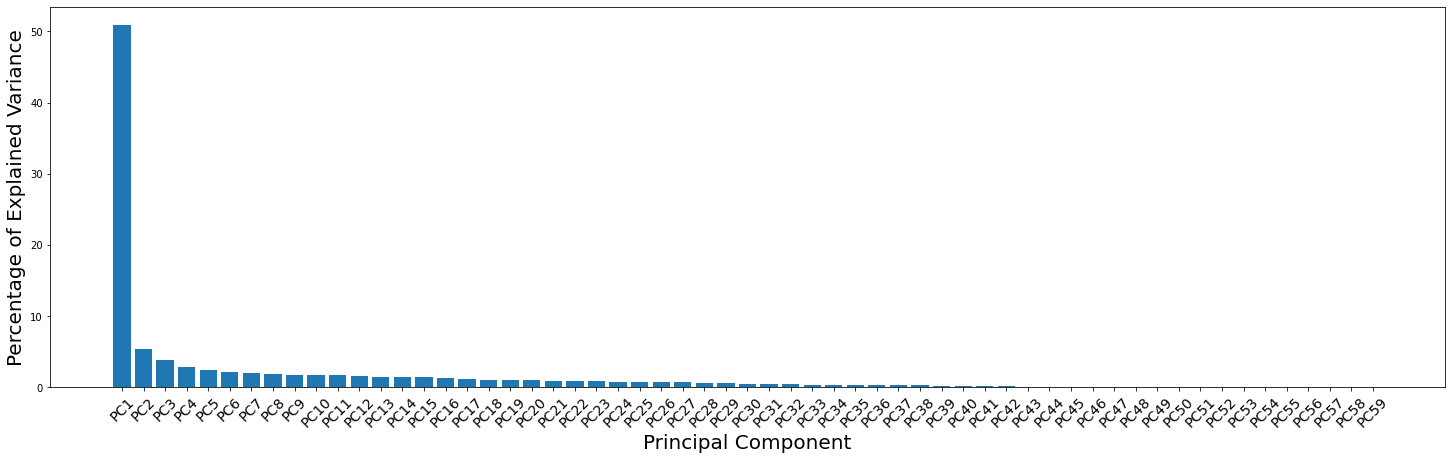

In [10]:
pca_model = PCA()
pca_model.fit(X_train)
reduction_2D = pca_model.transform(X_train)

Explained_Variance(pca_model)

PC1    50.9
PC2     5.4
dtype: float64

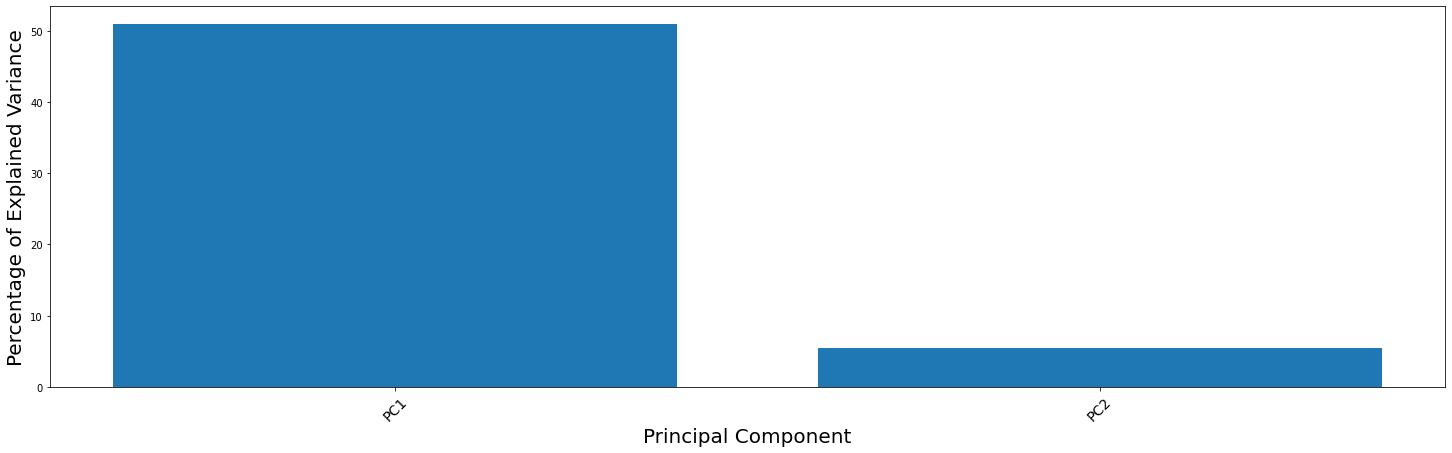

In [11]:
pca_model = PCA(n_components=2).fit(X_train)
Explained_Variance(pca_model)

principalComponents_2D = pca_model.transform(X_train)

In [12]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [13]:
principalDf = pd.DataFrame(data = principalComponents_2D
             , columns = ['principal component 1', 'principal component 2'])
y = y_train.reset_index(drop=True)
finalDf = pd.concat([principalDf, y], axis = 1)

display_side_by_side(principalDf.head(10), finalDf.head(10))

,principal component 1,principal component 2
0,-0.223600,4.033120
1,-4.263238,-0.941453
2,-6.037101,-1.041964
3,0.021873,0.083645
4,11.497843,4.653687
5,11.979119,1.193765
6,-0.787835,3.773365
7,-5.054839,0.045027
8,-4.119700,0.516172
9,0.486820,3.082083


# Visualize 2D Projection
# b. Plot a Scutter plot of points with number_of_components = 2. 

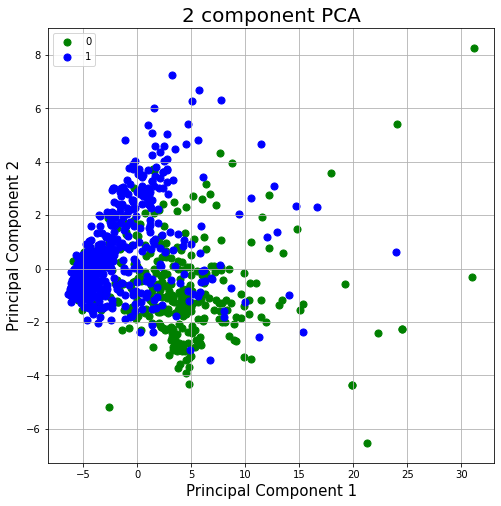

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Feature 60'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# c. Plot a Scutter plot of points with l =3 and calculate the Mean Reconstruction Error. 


PC1    50.9
PC2     5.4
PC3     3.8
dtype: float64

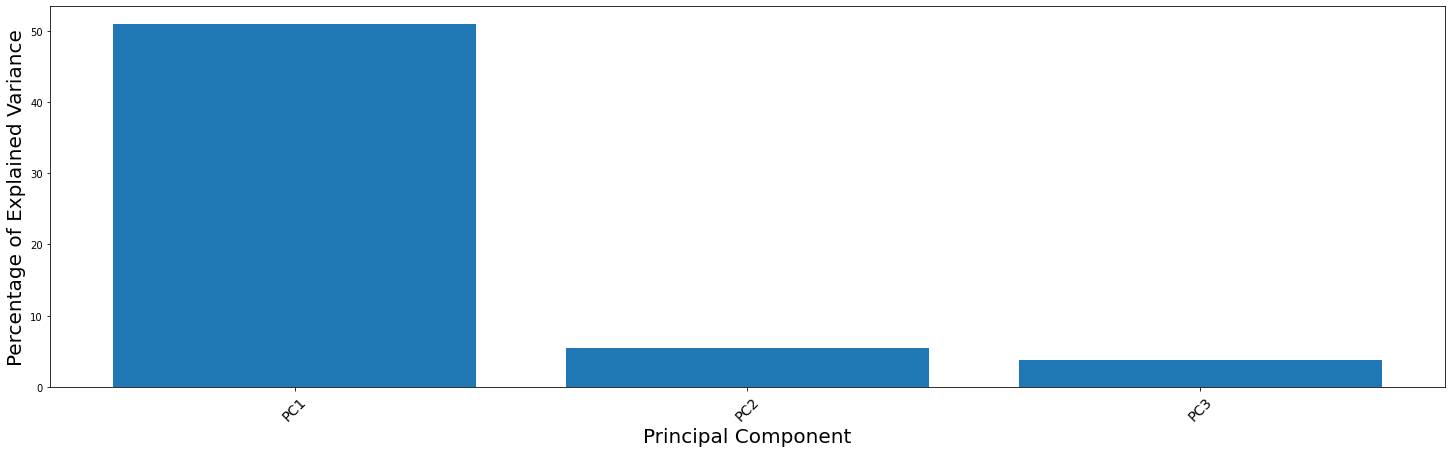

In [15]:
pca_model_3D = PCA(n_components=3).fit(X_train)
Explained_Variance(pca_model_3D)

principalComponents_3D = pca_model_3D.transform(X_train)


In [16]:
principalDf = pd.DataFrame(data = principalComponents_3D
             , columns = ['pc 1', 
                          'pc 2', 
                          'pc 3'])

y = y_train.reset_index(drop=True)
finalDf = pd.concat([principalDf, y], axis = 1)

display_side_by_side(principalDf.head(10), finalDf.head(10))

,pc 1,pc 2,pc 3
0,-0.223600,4.033107,-1.025361
1,-4.263238,-0.941448,-0.116120
2,-6.037101,-1.041975,0.255681
3,0.021873,0.083627,0.286271
4,11.497843,4.653679,1.693267
5,11.979119,1.193731,3.177006
6,-0.787835,3.773355,-1.499013
7,-5.054839,0.045033,0.299842
8,-4.119700,0.516154,0.285961
9,0.486820,3.082099,1.068583


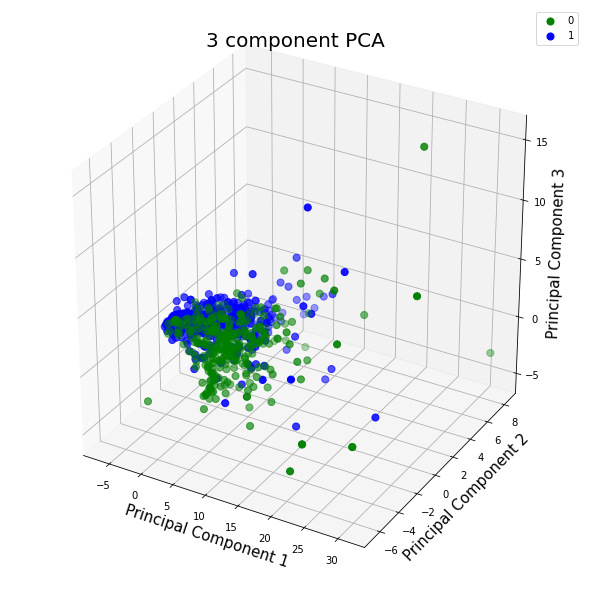

In [17]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Feature 60'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc 1']
               , finalDf.loc[indicesToKeep, 'pc 2']
               , finalDf.loc[indicesToKeep, 'pc 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#  calculate the Mean Reconstruction Error.

In [18]:
approximation  = pca_model_3D.inverse_transform(principalComponents_3D)

mre = np.abs((X_train - approximation)).mean()
print(f'Mean Reconstruct Error {mre}')

Mean Reconstruct Error 0.33735671282737717


# d. Use the last column of Y and plot the 2D scatter plot with two colors for points with Y=0 and Y=1

## Does the data in 2D look linearly separable? 
Perfect linear separation cannot be obtained.
But can be separated linearly and allow error (misidentification)

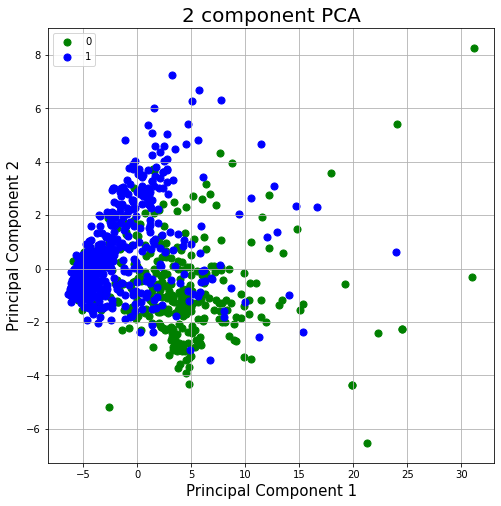

In [19]:
principalDf = pd.DataFrame(data = principalComponents_3D[:, 0:2]
             , columns = ['pc 1', 'pc 2'])
y = y_train.reset_index(drop=True)
finalDf = pd.concat([principalDf, y], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Feature 60'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc 1']
               , finalDf.loc[indicesToKeep, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [20]:
from sklearn.metrics import (accuracy_score, 
                             roc_curve, 
                             roc_auc_score, 
                             classification_report, 
                             plot_confusion_matrix)


def evualate__confusion_matrix(classifier, X_test, ground_trouth, title=None, fontsize=20):
    # Predetiction
    predetiction = classifier.predict(X_test)
    acc = accuracy_score(ground_trouth, predetiction)
    print(classification_report(ground_trouth, predetiction))
    print("Accuracy:", acc)
    print('\n')

    # Confusion matrix
    plot_confusion_matrix(classifier, 
                          X_test, 
                          ground_trouth,
                          cmap=plt.cm.Blues)
    plt.title(f'confusion matrix\n{title}', fontsize=fontsize)
    plt.show()

    #ROC and AuC
    y_pred_proba = classifier.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(ground_trouth,  y_pred_proba)
    auc = roc_auc_score(ground_trouth, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.title('ROC', fontsize=fontsize)
    plt.show()


    plt.show()
    print('-'*100)
    print('\n'*3)

    return acc


# Apply Logistic Regression to the Transformed Data

# e. Build a Logistic Regression model on the output vector with l=3. So the model will have intercept and 3 more weights


[principal component analysis for logistic regression with scikit learn](https://medium.com/@alepukhova526/principal-component-analysis-for-logistic-regression-with-scikit-learn-869b04b2f923)

[pca using python scikit learn](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

              precision    recall  f1-score   support

           0       0.79      0.54      0.64        41
           1       0.74      0.90      0.81        59

    accuracy                           0.75       100
   macro avg       0.76      0.72      0.72       100
weighted avg       0.76      0.75      0.74       100

Accuracy: 0.75




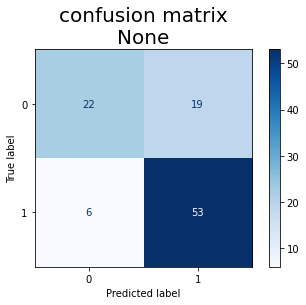

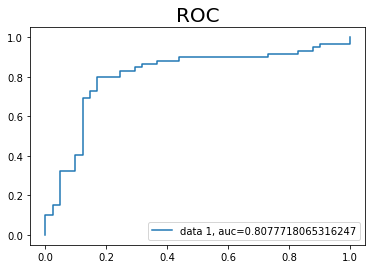

----------------------------------------------------------------------------------------------------






In [21]:
classifier = LogisticRegression()
#  Training the model on the data, storing the information learned from the data
classifier.fit(principalComponents_3D, y_train)

test_for_pca = pca_model_3D.transform(X_test)
cls_with_pca = evualate__confusion_matrix(classifier, 
                               test_for_pca, 
                               y_test)

#  Logistic regression model of HW1.

              precision    recall  f1-score   support

           0       0.75      0.51      0.61        41
           1       0.72      0.88      0.79        59

    accuracy                           0.73       100
   macro avg       0.74      0.70      0.70       100
weighted avg       0.73      0.73      0.72       100

Accuracy: 0.73




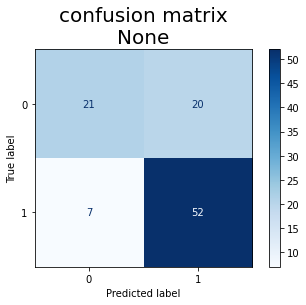

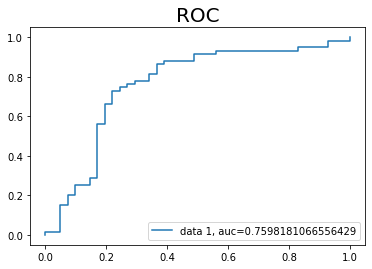

----------------------------------------------------------------------------------------------------






In [22]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
cls_without_pca = evualate__confusion_matrix(classifier, X_test, y_test)

# Compare resulsts

In [23]:
if cls_with_pca > cls_without_pca:
    print('PCA is F*** awesome!!')
else:
    print("U can take your's PCA algorithm and go HOME")

PCA is F*** awesome!!


#  Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [25]:
def get_X_y_regression(split_data=False):
    x, _ = get_X_y() # The binary label Y (Feature 60) is erased, number 59, which holds a ‘text complexity’ value for each article, is examined.

    X = x.drop(['Feature 59'], axis=1) 
#     df.iloc[:,-1]
    y = x.iloc[:,-1]
    if split_data:
        return split(X, y, test_size=0.10, random_state=42)
        
    return X, y



# Split the data into 90:10 of Train:Test

In [26]:
X_train, X_test, y_train, y_test = get_X_y_regression(split_data=True)

In [27]:
# create a Linear Regression model object

#  Construct a PCA model on the train data on features 1-58 with l=5. 

PC1    51.2
PC2     5.5
PC3     3.7
PC4     2.7
PC5     2.4
dtype: float64

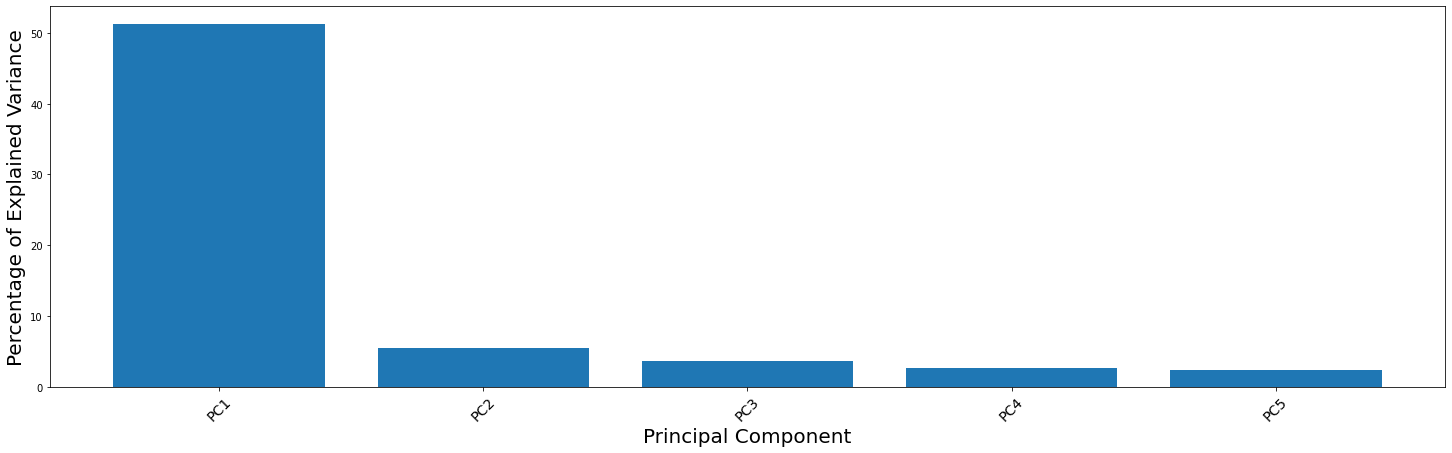

In [28]:
pca_model_5D = PCA(n_components=5).fit(X_train, y_train)
reduction_5D = pca_model_5D.transform(X_train)
Explained_Variance(pca_model_5D, 5)

# b. Build a Linear Regression model on the output vector, column 59, with l=5. 


In [32]:
regression_model = LinearRegression()
regression_model.fit(reduction_5D, y_train)
test_for_pca = pca_model_5D.transform(X_test)

pred = regression_model.predict(test_for_pca)
pca_mse = mean_squared_error(y_test, pred)
pca_mse

60.46732925914665

# Compare your results with the metrics to the Linear regression model of HW1.

In [33]:
regression_model.fit(X_train, y_train);
regression_predictions = regression_model.predict(X_test)
mse = mean_squared_error(y_test, regression_predictions)
mse

33.319522893820036

In [35]:
if pca_mse < mse:
    print('PCA is F*** awesome!!')
else:
    print("U can take your's PCA algorithm and go HOME")

U can take your's PCA algorithm and go HOME
